# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load The Data](#3.4_Load_The_Data)
    * [3.4.1 Job's data](#3.4.1_jobs_data)
    * [3.4.2 State-wide summary data](#3.4.2_State-wide_summary_data)
  * [3.5 Explore The Data](#3.5_Explore_The_Data)
    * [3.5.1 Top States By Order Of Each Of The Summary Statistics](#3.5.1_Top_States_By_Order_Of_Each_Of_The_Summary_Statistics)
    * [3.5.3 Visualizing High Dimensional Data](#3.5.3_Visualizing_High_Dimensional_Data)
      * [3.5.3.1 Scale the data](#3.5.3.1_Scale_the_data)
        * [3.5.3.1.1 Verifying the scaling](#3.5.3.1.1_Verifying_the_scaling)
      * [3.5.3.2 Calculate the PCA transformation](#3.5.3.2_Calculate_the_PCA_transformation)
      * [3.5.3.3 Average salary by state](#3.5.3.3_average_salary_by_state)
      * [3.5.3.4 Adding average salary to scatter plot](#3.5.3.4_Adding_average_salary_to_scatter_plot)
    * [3.5.4 Conclusion On How To Handle State Label](#3.5.4_Conclusion_On_How_To_Handle_State_Label)
    * [3.5.5 Jobs Numeric Data](#3.5.5_jobs_Numeric_Data)
      * [3.5.5.1 Feature engineering](#3.5.5.1_Feature_engineering)
      * [3.5.5.2 Feature correlation heatmap](#3.5.5.2_Feature_correlation_heatmap)
      * [3.5.5.3 Scatterplots of numeric features against average salary](#3.5.5.3_Scatterplots_of_numeric_features_against_average_salary)
  * [3.6 Summary](#3.6_Summary)


## 3.2 Introduction<a id='3.2_Introduction'></a>

3.2 Introduction

At this point, you should have a firm idea of what your data science problem is and have the data you believe could help 
solve it. The business problem was a general one of modeling average salary and jobs. The data you started with contained some 
average salary values, but with a number of missing values that led to several rows being dropped completely.There were also 
some obvious issues with some of the other features in the data that,for example, led to one column being completely dropped, 
a data error corrected, and some other rows dropped. 

The data science problem you subsequently identified is to predict the average salary for FL State.

3.3 Imports

In [46]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import preprocessing
import os
import datetime
import re as re
from pandas.api.types import is_string_dtype, is_numeric_dtype
from library.sb_utils import save_file

## 3.4 Load The Data<a id='3.4_Load_The_Data'></a>

### 3.4.1 Job's data<a id='3.4.1_jobs_data'></a>

In [47]:
numer_data = pd.read_csv('./data/intermediate/result_numer.csv')

In [48]:
numer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             3909 non-null   float64
 1   Ave_Salary         3909 non-null   float64
 2   Founded_Years      3909 non-null   float64
 3   City               3909 non-null   object 
 4   State              3909 non-null   object 
 5   Max_Company_Size   3909 non-null   float64
 6   Highest_Revenue    3909 non-null   int64  
 7   Max_USD_Revenue    3909 non-null   float64
 8   Python_knowledge   3909 non-null   int64  
 9   MatLab_knowledge   3909 non-null   int64  
 10  PowerBI_knowledge  3909 non-null   int64  
 11  SQL_knowledge      3909 non-null   int64  
 12  ETL_knowledge      3909 non-null   int64  
 13  Math_knowledge     3909 non-null   int64  
 14  Work_Remote        3909 non-null   int64  
 15  GitHub_works       3909 non-null   int64  
 16  DataB_knowledge    3909 

3.4.2 State-wide summary data  

In [49]:
# Average Salary per State 
state_salary_means = numer_data.groupby('State')['Ave_Salary'].mean().sort_values(ascending=False).head(100)
print(state_salary_means)

State
CA                           133.636719
Brentford, United Kingdom    132.750000
Ohio                         131.000000
MA                           106.336134
DC                           104.175000
NJ                           102.661290
MN                           100.875000
TN                           100.781250
MI                           100.428571
RI                           100.000000
NY                            99.215116
HI                            98.500000
NC                            97.875000
MD                            97.353659
KY                            97.000000
AZ                            96.998371
VA                            96.888060
WA                            95.543478
TX                            95.366641
United States                 95.000000
PA                            94.542818
UT                            94.150000
OH                            93.618557
OR                            92.125000
IN                            92.0

In [50]:
numer_data.head()

,Rating,Ave_Salary,Founded_Years,City,State,Max_Company_Size,Highest_Revenue,Max_USD_Revenue,Python_knowledge,MatLab_knowledge,PowerBI_knowledge,SQL_knowledge,ETL_knowledge,Math_knowledge,Work_Remote,GitHub_works,DataB_knowledge,Jobs
0,3.8,72.0,48.0,Albuquerque,NM,1000.0,100,1.000000e+08,1,1,1,0,0,1,0,0,1,1
1,3.4,87.5,37.0,Linthicum,MD,10000.0,5,5.000000e+09,1,0,0,0,0,1,0,0,1,1
2,4.8,85.0,11.0,Clearwater,FL,1000.0,500,5.000000e+08,1,0,0,1,0,1,0,0,0,1
3,3.8,76.5,56.0,Richland,WA,5000.0,1,1.000000e+09,1,0,0,0,0,1,0,0,0,1
4,2.9,114.5,23.0,New York,NY,200.0,1,1.000000e+00,1,0,0,1,0,1,0,0,1,1


### 3.4.2 State-wide summary data<a id='3.4.2_State-wide_summary_data'></a>

In [51]:
state_summary = numer_data.groupby('State').agg(
    jobs_per_state=pd.NamedAgg(column='Jobs', aggfunc='sum'), #could pick any column here
    state_ave_salary=pd.NamedAgg(column='Ave_Salary', aggfunc='mean'),
    state_total_Rating=pd.NamedAgg(column='Rating', aggfunc='mean'),
    state_total_Revenue=pd.NamedAgg(column='Max_USD_Revenue', aggfunc='mean'),
    state_total_Company=pd.NamedAgg(column='Max_Company_Size', aggfunc='mean'),
    state_total_Python=pd.NamedAgg(column='Python_knowledge', aggfunc='sum'),
    state_total_Sql=pd.NamedAgg(column='SQL_knowledge', aggfunc='sum'),
    state_total_DataB=pd.NamedAgg(column='DataB_knowledge', aggfunc='sum'),
    state_total_Math=pd.NamedAgg(column='Math_knowledge', aggfunc='sum')
).reset_index()
state_summary.head()

,State,jobs_per_state,state_ave_salary,state_total_Rating,state_total_Revenue,state_total_Company,state_total_Python,state_total_Sql,state_total_DataB,state_total_Math
0,AL,10,67.150000,4.180000,2.120000e+09,3230.000000,4,2,4,5
1,AZ,307,96.998371,3.336156,2.077026e+09,3728.273616,146,173,141,79
2,"Brentford, United Kingdom",2,132.750000,3.900000,1.000000e+10,10000.000000,1,0,0,0
3,CA,896,133.636719,3.552790,2.631595e+09,4035.379464,490,407,359,261
4,CO,11,75.000000,3.790909,1.136364e+09,2504.545455,7,6,3,0


## 3.5 Explore The Data<a id='3.5_Explore_The_Data'></a>

### 3.5.1 Top States By Order Of Each Of The Summary Statistics<a id='3.5.1_Top_States_By_Order_Of_Each_Of_The_Summary_Statistics'></a>

In [52]:
numer_data_newind = state_summary.set_index('State')

In [53]:
# Python Knowledge Requirements Jobs per State
numer_data_newind.state_total_Python.sort_values(ascending=False).head()

State
TX    640
CA    490
PA    152
AZ    146
IL    112
Name: state_total_Python, dtype: int64

In [54]:
# SQL Knowledge Requirements Jobs per State
numer_data_newind.state_total_Sql.sort_values(ascending=False).head()

State
TX    696
CA    407
AZ    173
PA    154
IL    102
Name: state_total_Sql, dtype: int64

In [55]:
# Database Knowledge Requirements Jobs per State
numer_data_newind.state_total_DataB.sort_values(ascending=False).head()

State
TX    573
CA    359
PA    148
AZ    141
IL     97
Name: state_total_DataB, dtype: int64

In [56]:
# Math Knowledge Requirements Jobs per State
numer_data_newind.state_total_Math.sort_values(ascending=False).head()

State
TX    383
CA    261
AZ     79
PA     78
OH     56
Name: state_total_Math, dtype: int64

### 3.5.3 Visualizing High Dimensional Data<a id='3.5.3_Visualizing_High_Dimensional_Data'></a>

You may be starting to feel there's a bit of a problem here, or at least a challenge. You've constructed some potentially useful and business relevant features, derived from summary statistics, for each of the states you're concerned with. You've explored many of these features in turn and found various trends. Some states are higher in some but not in others. Some features will also be more correlated with one another than others.

One way to disentangle this interconnected web of relationships is via [principle components analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) (PCA). This technique will find linear combinations of the original features that are uncorrelated with one another and order them by the amount of variance they explain. You can use these derived features to visualize the data in a lower dimension (e.g. 2 down from 7) and know how much variance the representation explains. You can also explore how the original features contribute to these derived features.

The basic steps in this process are:

1. scale the data (important here because our features are heterogenous)
2. fit the PCA transformation (learn the transformation from the data)
3. apply the transformation to the data to create the derived features
4. (optionally) use the derived features to look for patterns in the data and explore the coefficients

#### 3.5.3.1 Scale the data<a id='3.5.3.1_Scale_the_data'></a>

In [57]:
#Code task 1#
#Create a new dataframe, `state_summary_scale` from `state_summary` whilst setting the index to 'state'
state_summary_scale = state_summary.set_index('State')
#Save the state labels (using the index attribute of `state_summary_scale`) into the variable 'state_summary_index'
state_summary_index = state_summary_scale.index
#Save the column names (using the `columns` attribute) of `state_summary_scale` into the variable 'state_summary_columns'
state_summary_columns = state_summary_scale.columns
state_summary_scale.head()

,jobs_per_state,state_ave_salary,state_total_Rating,state_total_Revenue,state_total_Company,state_total_Python,state_total_Sql,state_total_DataB,state_total_Math
State,,,,,,,,,
AL,10,67.150000,4.180000,2.120000e+09,3230.000000,4,2,4,5
AZ,307,96.998371,3.336156,2.077026e+09,3728.273616,146,173,141,79
"Brentford, United Kingdom",2,132.750000,3.900000,1.000000e+10,10000.000000,1,0,0,0
CA,896,133.636719,3.552790,2.631595e+09,4035.379464,490,407,359,261
CO,11,75.000000,3.790909,1.136364e+09,2504.545455,7,6,3,0


In [58]:
#state_summary_scale=preprocessing.scale(state_summary_scale, *, axis=0, with_mean=True, with_std=True, copy=True)
state_summary_scale=preprocessing.scale(state_summary_scale,axis=0, with_mean=True, with_std=True, copy=True)
state_summary_scale = scale(state_summary_scale)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [59]:
#Code task 2#
#Create a new dataframe from `state_summary_scale` using the column names we saved in `state_summary_columns`
state_summary_scaled_df = pd.DataFrame(state_summary_scale, columns=state_summary_columns)
state_summary_scaled_df.head()

,jobs_per_state,state_ave_salary,state_total_Rating,state_total_Revenue,state_total_Company,state_total_Python,state_total_Sql,state_total_DataB,state_total_Math
0,-0.328960,-1.371168,1.028102,-0.148846,-0.355160,-0.330557,-0.341302,-0.331266,-0.303190
1,0.942088,0.364577,-0.349313,-0.165237,-0.158141,0.860789,1.084494,1.023912,0.782425
2,-0.363197,2.443609,0.571055,2.856675,2.321718,-0.355726,-0.357978,-0.370833,-0.376542
3,3.462787,2.495173,0.004301,0.046282,-0.036710,3.746867,3.035583,3.180327,3.452449
4,-0.324681,-0.914674,0.392985,-0.524016,-0.642006,-0.305387,-0.307950,-0.341158,-0.376542


##### 3.5.3.1.1 Verifying the scaling<a id='3.5.3.1.1_Verifying_the_scaling'></a>

In [60]:
#Code task 3#
#Call `state_summary_scaled_df`'s `mean()` method
state_summary_scaled_df.mean()

jobs_per_state         2.713879e-17
state_ave_salary      -9.868649e-18
state_total_Rating     6.784696e-18
state_total_Revenue    4.687608e-17
state_total_Company   -1.727014e-17
state_total_Python    -9.868649e-18
state_total_Sql       -2.343804e-17
state_total_DataB      2.713879e-17
state_total_Math      -4.934325e-18
dtype: float64

In [61]:
#Code task 4#
#Call `state_summary_scaled_df`'s `std()` method
state_summary_scaled_df.std()

jobs_per_state         1.0113
state_ave_salary       1.0113
state_total_Rating     1.0113
state_total_Revenue    1.0113
state_total_Company    1.0113
state_total_Python     1.0113
state_total_Sql        1.0113
state_total_DataB      1.0113
state_total_Math       1.0113
dtype: float64

In [62]:
#Code task 5#
#Repeat the previous call to `std()` but pass in ddof=0 
state_summary_scaled_df.std(ddof=0)

jobs_per_state         1.0
state_ave_salary       1.0
state_total_Rating     1.0
state_total_Revenue    1.0
state_total_Company    1.0
state_total_Python     1.0
state_total_Sql        1.0
state_total_DataB      1.0
state_total_Math       1.0
dtype: float64

#### 3.5.3.2 Calculate the PCA transformation<a id='3.5.3.2_Calculate_the_PCA_transformation'></a>

In [63]:
state_pca = PCA().fit(state_summary_scale)

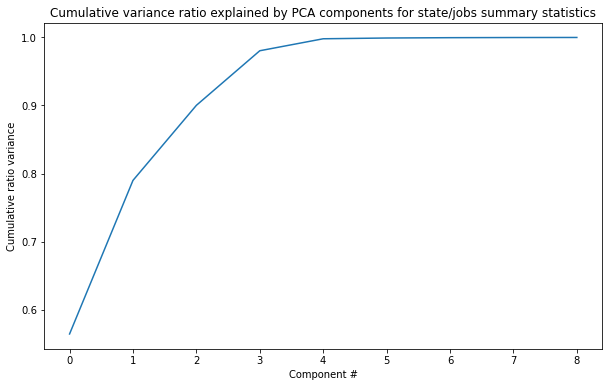

In [64]:
#Code task 6#
#Call the `cumsum()` method on the 'explained_variance_ratio_' attribute of `state_pca` and
#create a line plot to visualize the cumulative explained variance ratio with number of components
#Set the xlabel to 'Component #', the ylabel to 'Cumulative ratio variance', and the
#title to 'Cumulative variance ratio explained by PCA components for state/jobs summary statistics'
#Hint: remember the handy ';' at the end of the last plot call to suppress that untidy output
plt.subplots(figsize=(10, 6))
plt.plot(state_pca.explained_variance_ratio_.cumsum());
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for state/jobs summary statistics');

In [65]:
#Code task 7#
#Call `state_pca`'s `transform()` method, passing in `state_summary_scale` as its argument
state_pca_x = state_pca.transform(state_summary_scale)

In [66]:
state_pca_x.shape

(45, 9)

Plot the first two derived features (the first two principle components) and label each point with the name of the state.

Take a moment to familiarize yourself with the code below. It will extract the first and second columns from the transformed data (state_pca_x) as x and y coordinates for plotting. Recall the state labels you saved (for this purpose) for subsequent calls to plt.annotate. Grab the second (index 1) value of the cumulative variance ratio to include in your descriptive title; this helpfully highlights the percentage variance explained by the two PCA components you're visualizing. Then create an appropriately sized and well-labelled scatterplot to convey all of this information.

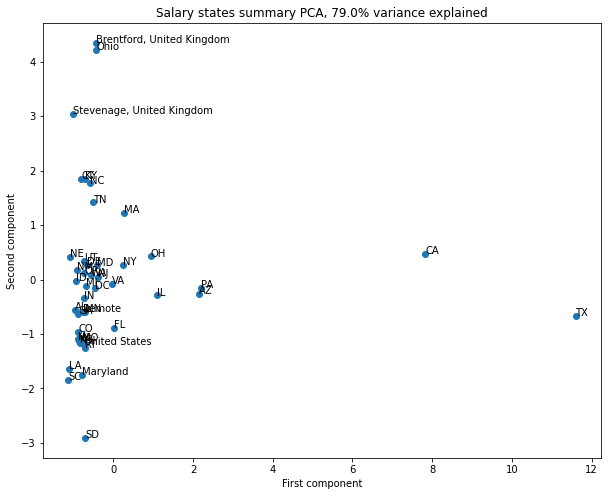

In [67]:
x = state_pca_x[:, 0]
y = state_pca_x[:, 1]
state = state_summary_index
pc_var = 100 * state_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Salary states summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))

#### 3.5.3.3 Average salary by state<a id='3.5.3.3_average_salary_by_state'></a>

In [68]:
#Code task 8#
#Calculate the average salary by state
state_avg_salary = numer_data.groupby('State')['Ave_Salary'].mean()
state_avg_salary

State
AL                            67.150000
AZ                            96.998371
Brentford, United Kingdom    132.750000
CA                           133.636719
CO                            75.000000
CT                            85.142857
DC                           104.175000
DE                            91.343750
FL                            79.962766
GA                            80.666667
HI                            98.500000
IA                            78.900000
ID                            74.000000
IL                            88.806283
IN                            92.045455
KS                            87.000000
KY                            97.000000
LA                            51.000000
MA                           106.336134
MD                            97.353659
MI                           100.428571
MN                           100.875000
MO                            84.400000
Maryland                      90.500000
NC                            97.8

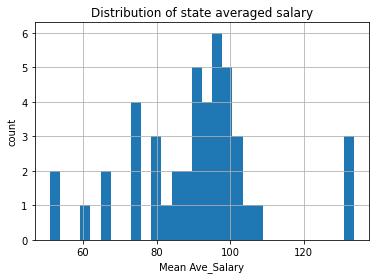

In [69]:
state_avg_salary.hist(bins=30)
plt.title('Distribution of state averaged salary')
plt.xlabel('Mean Ave_Salary')
plt.ylabel('count');

#### 3.5.3.4 Adding  average salary to scatter plot<a id='3.5.3.4_Adding_average_salary_to_scatter_plot'></a>

At this point you have several objects floating around. You have just calculated average salary by state from our 
jobs data, but you've been looking at principle components generated from other state summary data. We extracted 
indexes and column names from a dataframe and the first two principle components from an array. It's becoming a bit hard 
to keep track of them all. You'll create a new DataFrame to do this.

In [70]:
#Code task 9#
#Create a dataframe containing the values of the first two PCA components
#Remember the first component was given by state_pca_x[:, 0],
#and the second by state_pca_x[:, 1]
#Call these 'PC1' and 'PC2', respectively and set the dataframe index to `state_summary_index`
pca_df = pd.DataFrame({'PC1': state_pca_x[:, 0], 'PC2':state_pca_x[:, 1]}, index=state_summary_index)
pca_df.head()

,PC1,PC2
State,,
AL,-0.962707,-0.561392
AZ,2.138734,-0.260360
"Brentford, United Kingdom",-0.440225,4.347812
CA,7.830878,0.477685
CO,-0.885769,-0.957256


In [71]:
# our average state salary also have state as an index
state_avg_salary.head()

State
AL                            67.150000
AZ                            96.998371
Brentford, United Kingdom    132.750000
CA                           133.636719
CO                            75.000000
Name: Ave_Salary, dtype: float64

In [72]:
# we can also cast it to a dataframe using Series' to_frame() method:
state_avg_salary.to_frame().head()

,Ave_Salary
State,
AL,67.150000
AZ,96.998371
"Brentford, United Kingdom",132.750000
CA,133.636719
CO,75.000000


Now you can concatenate both parts on axis 1 and using the indexes.

In [73]:
#Code task 10#
#Use pd.concat to concatenate `pca_df` and `state_avg_price` along axis 1
# remember, pd.concat will align on index
pca_df = pd.concat([pca_df, state_avg_salary], axis=1)
pca_df.head()

,PC1,PC2,Ave_Salary
State,,,
AL,-0.962707,-0.561392,67.150000
AZ,2.138734,-0.260360,96.998371
"Brentford, United Kingdom",-0.440225,4.347812,132.750000
CA,7.830878,0.477685,133.636719
CO,-0.885769,-0.957256,75.000000


You saw some range in average salary histogram above, but it may be hard to pick out 
differences if you're thinking of using the value for point size. You'll add another column where you 
separate these salary into quartiles; that might show something.

In [74]:
pca_df['Quartile'] = pd.qcut(pca_df.Ave_Salary, q=4, precision=1)
pca_df.head()

,PC1,PC2,Ave_Salary,Quartile
State,,,,
AL,-0.962707,-0.561392,67.150000,"(50.9, 80.7]"
AZ,2.138734,-0.260360,96.998371,"(93.6, 98.5]"
"Brentford, United Kingdom",-0.440225,4.347812,132.750000,"(98.5, 133.6]"
CA,7.830878,0.477685,133.636719,"(98.5, 133.6]"
CO,-0.885769,-0.957256,75.000000,"(50.9, 80.7]"


In [75]:
# Note that Quartile is a new data type: category
# This will affect how we handle it later on
pca_df.dtypes

PC1            float64
PC2            float64
Ave_Salary     float64
Quartile      category
dtype: object

This looks great. But, let's have a healthy paranoia about it. You've just created a whole new DataFrame by 
combining information. Do we have any missing values? It's a narrow DataFrame, only four columns, so you'll just 
print out any rows that have any null values, expecting an empty DataFrame.

In [76]:
pca_df[pca_df.isnull().any(axis=1)]

,PC1,PC2,Ave_Salary,Quartile
State,,,,


You now have enough information to recreate the scatterplot, now adding marker size for salary and colour for the discrete
quartile.

Notice in the code below how you're iterating over each quartile and plotting the points in the same quartile group as one. 
This gives a list of quartiles for an informative legend with points coloured by quartile and sized by salary
(higher salary are represented by larger point markers).

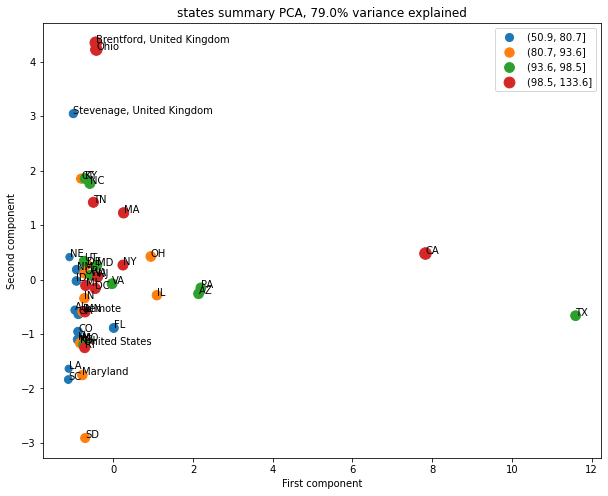

In [77]:
x = pca_df.PC1
y = pca_df.PC2
ave_salary = pca_df.Ave_Salary
quartiles = pca_df.Quartile
state = pca_df.index
pc_var = 100 * state_pca.explained_variance_ratio_.cumsum()[1]
fig, ax = plt.subplots(figsize=(10,8))
for q in quartiles.cat.categories:
    im = quartiles == q
    ax.scatter(x=x[im], y=y[im], s=ave_salary[im], label=q)
ax.set_xlabel('First component')
ax.set_ylabel('Second component')
plt.legend()
ax.set_title(f'states summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))

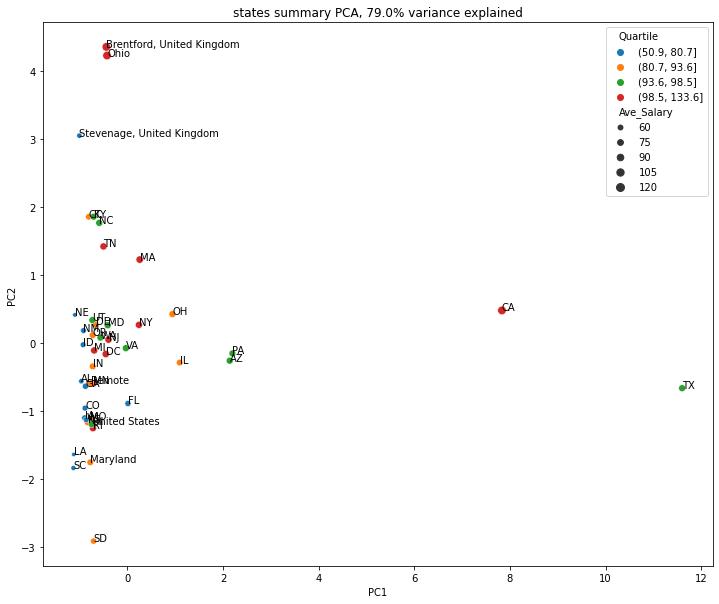

In [78]:
#
#Create a seaborn scatterplot by calling `sns.scatterplot`
#Specify the dataframe pca_df as the source of the data,
#specify 'PC1' for x and 'PC2' for y,
#specify 'average salary' for the pointsize (scatterplot's `size` argument),
#specify 'Quartile' for `hue`
#specify pca_df.Quartile.cat.categories for `hue_order` - what happens with/without this?
x = pca_df.PC1
y = pca_df.PC2
state = pca_df.index
plt.subplots(figsize=(12, 10))
# Note the argument below to make sure we get the colours in the ascending
# order we intuitively expect!
#sns.scatterplot(x='PC1', y='PC2', size='average salary', hue='Quartile', data=pca_df)
sns.scatterplot(x='PC1', y='PC2', size='Ave_Salary', hue='Quartile',hue_order=pca_df.Quartile.cat.categories, data=pca_df)
#and we can still annotate with the state labels
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))   
plt.title(f'states summary PCA, {pc_var:.1f}% variance explained');

The components_ attribute of the fitted PCA object tell us how important (and in what direction) each feature contributes to each score (or coordinate on the plot). NB we were sensible and scaled our original features (to zero mean and unit variance). You may not always be interested in interpreting the coefficients of the PCA transformation in this way, although it's more likely you will when using PCA for EDA as opposed to a preprocessing step as part of a machine learning pipeline. The attribute is actually a numpy ndarray, and so has been stripped of helpful index and column names. Fortunately, you thought ahead and saved these. This is how we were able to annotate the scatter plots above. It also means you can construct a DataFrame of components_ with the feature names for context:

In [79]:
pd.DataFrame(state_pca.components_, columns=state_summary_columns)

,jobs_per_state,state_ave_salary,state_total_Rating,state_total_Revenue,state_total_Company,state_total_Python,state_total_Sql,state_total_DataB,state_total_Math
0,0.442599,0.148434,-0.033240,0.004140,0.004545,0.442276,0.441015,0.441868,0.442246
1,-0.018949,0.338059,0.187426,0.654796,0.647452,-0.017075,-0.029746,-0.026408,-0.020072
2,-0.035982,0.370462,-0.919427,0.094388,-0.029602,-0.032451,-0.044478,-0.040626,-0.040617
3,0.047576,-0.847331,-0.338558,0.233769,0.313450,0.026229,0.074946,0.067118,0.037896
4,-0.008661,0.081884,-0.060977,-0.712362,0.693977,0.002778,-0.019832,-0.005982,-0.000887
5,0.123247,-0.042022,-0.007238,0.012589,-0.004400,0.620939,-0.623581,-0.372792,0.263480
6,0.443477,0.000614,0.005192,-0.002031,-0.001629,0.211589,-0.230359,0.341952,-0.767156
7,0.501690,-0.000200,-0.000761,-0.000127,-0.002678,-0.598343,-0.468798,0.206292,0.357710
8,-0.580138,-0.000118,0.000462,0.006735,-0.004995,0.118329,-0.367345,0.706684,0.122569


### 3.5.4 Conclusion On How To Handle State Label<a id='3.5.4_Conclusion_On_How_To_Handle_State_Label'></a>

You can offer some justification for treating all states equally, and work towards building a salary model that considers
all states together, without treating any one particularly specially. You haven't seen any clear grouping yet, but you have 
captured potentially relevant state data in features most likely to be relevant to your business use case. This answers a 
big question!

### 3.5.5 Jobs Numeric Data<a id='3.5.5_jobs_Numeric_Data'></a>

#### 3.5.5.1 Feature engineering<a id='3.5.5.1_Feature_engineering'></a>

In [80]:
state_summary.head()

,State,jobs_per_state,state_ave_salary,state_total_Rating,state_total_Revenue,state_total_Company,state_total_Python,state_total_Sql,state_total_DataB,state_total_Math
0,AL,10,67.150000,4.180000,2.120000e+09,3230.000000,4,2,4,5
1,AZ,307,96.998371,3.336156,2.077026e+09,3728.273616,146,173,141,79
2,"Brentford, United Kingdom",2,132.750000,3.900000,1.000000e+10,10000.000000,1,0,0,0
3,CA,896,133.636719,3.552790,2.631595e+09,4035.379464,490,407,359,261
4,CO,11,75.000000,3.790909,1.136364e+09,2504.545455,7,6,3,0


In [81]:
# DataFrame's merge method provides SQL-like joins
# here 'state' is a column (not an index)
numer_data = numer_data.merge(state_summary, how='left', on='State')
numer_data.head().T

,0,1,2,3,4
Rating,3.8,3.4,4.8,3.8,2.9
Ave_Salary,72.0,87.5,85.0,76.5,114.5
Founded_Years,48.0,37.0,11.0,56.0,23.0
City,Albuquerque,Linthicum,Clearwater,Richland,New York
State,NM,MD,FL,WA,NY
Max_Company_Size,1000.0,10000.0,1000.0,5000.0,200.0
Highest_Revenue,100,5,500,1,1
Max_USD_Revenue,100000000.0,5000000000.0,500000000.0,1000000000.0,1.0
Python_knowledge,1,1,1,1,1
MatLab_knowledge,1,0,0,0,0


In [82]:
numer_data.drop(columns=['Jobs'], inplace=True)

#### 3.5.5.2 Feature correlation heatmap<a id='3.5.5.2_Feature_correlation_heatmap'></a>

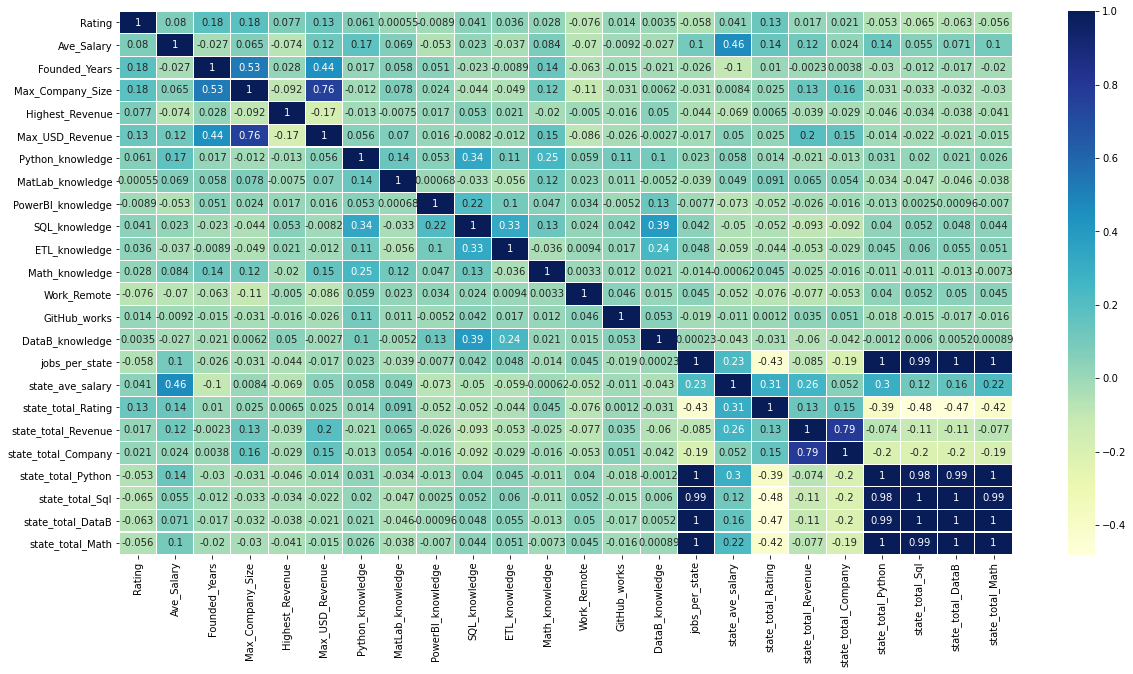

In [83]:
#Code task 12#
#Show a seaborn heatmap of correlations in ski_data
#Hint: call pandas' `corr()` method on `ski_data` and pass that into `sns.heatmap`
plt.subplots(figsize=(20,10))
sns.heatmap(numer_data.corr(),linewidths=.1,cmap="YlGnBu", annot=True);

#### 3.5.5.3 Scatterplots of numeric features against average salary<a id='3.5.5.3_Scatterplots_of_numeric_features_against_average_salary'></a>

In [84]:
# define useful function to create scatterplots of average salary against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'Ave_Salary', data=numer_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Mean Salary')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [85]:
#Code task 13#
#Use a list comprehension to build a list of features from the columns of `numer_data` that
#are _not_ any of  'City','State','Ave_Salary'
#features = [column  for column in numer_data.columns if any not in ['City','State', 'Ave_Salary',]]
features = [column  for column in numer_data.columns if any not in ['City','State', 'Ave_Salary',]]

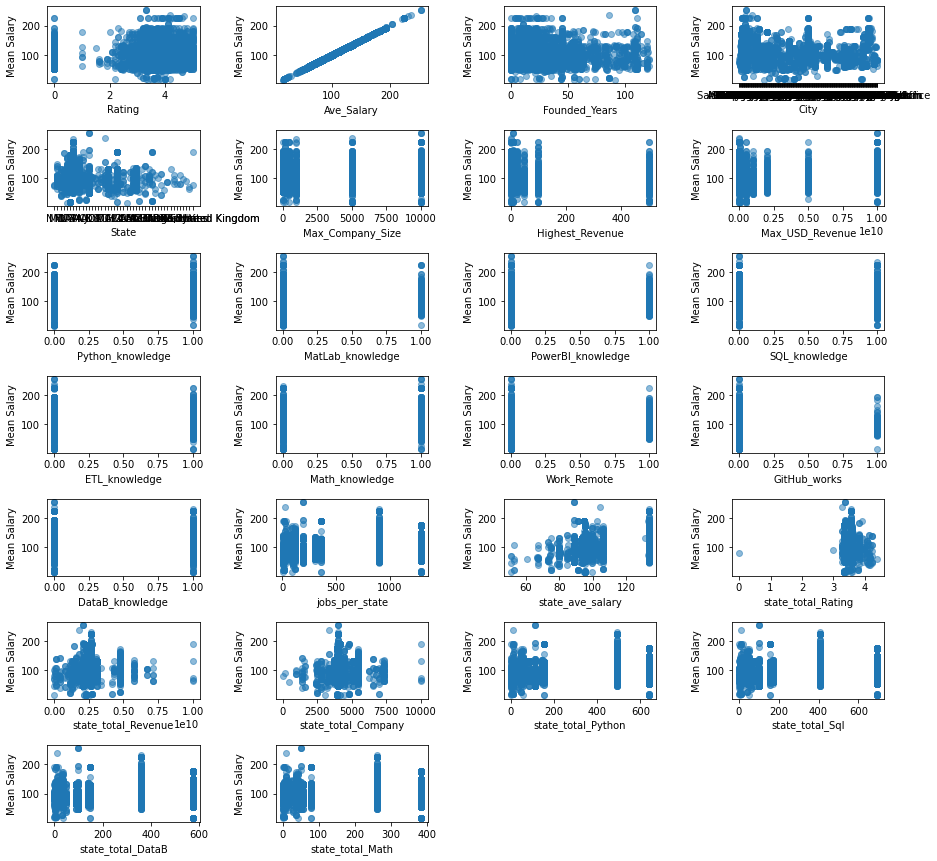

In [86]:
scatterplots(features, ncol=4, figsize=(15, 15))

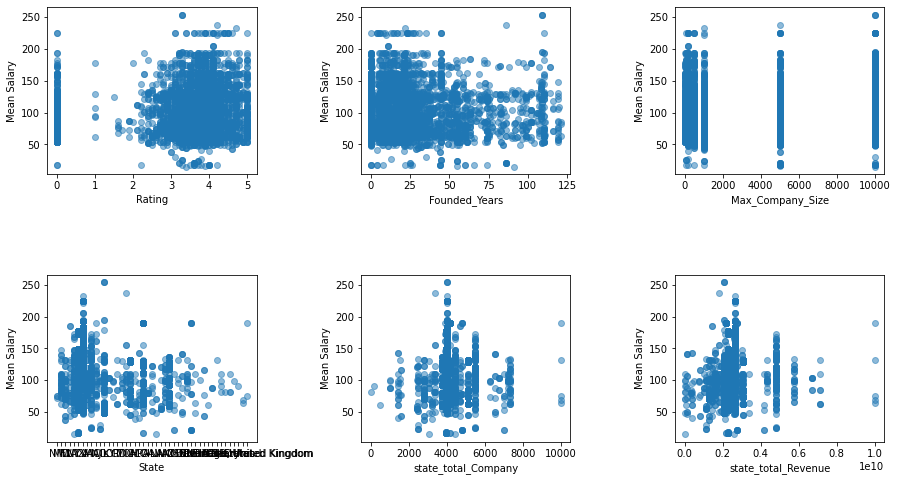

In [87]:
scatterplots(['Rating','Founded_Years','Max_Company_Size','State','state_total_Company','state_total_Revenue'], ncol=3)

In [88]:
# Save the data 
#result_num.to_csv (r'd:\ProgramData\Jupyter\Capstone2\result_numer.csv', index = False, header=True)
numer_data.to_csv (r'./data/processed/numer_data_step3_features.csv', index = False, header=True)
#(numer_data, 'numer_data_step3_features.csv')

## 3.6 Summary<a id='3.6_Summary'></a>

**Q: 1** Write a summary of the exploratory data analysis above. What numerical or categorical features were in the data? Was 
    there any pattern suggested of a relationship between state and average salary? What did this lead us to decide regarding 
    which features to use in subsequent modeling? What aspects of the data (e.g. relationships between features) should you 
    remain wary of when you come to perform feature selection for modeling? Two key points that must be addressed are the 
    choice of target feature for your modelling and how, if at all, you're going to handle the states labels in the data.

1) Certain States(Like Texas, California,PA) and certain cities(Like Austin,Houston, San Diego,Dallas, San Antonio) have 
   more job options as a Data Scientist

2) The maximum size of the company, the highest income of the companies, the rating of the companies and the years of 
   foundation have some directly relation to the average salary paid

3) Certain states have the highest salary than others without a high relationship to knowledge of Python, math, SQL, or 
   knowledge of databases. It could be because they have a higher cost of living, being areas of technological development 
   such as Silicon Valley or simply because that state has greater growth

4) The amount of jobs offered are directly related to the knowledge of Python, SQL, Math, and Database and it is logical 
   because that general knowledge is currently needed in these areas, the interesting thing is that the relationship is not 
   so high with the average salary and this it may be because all jobs ask for it
    

5) The rating of companies by states fluctuates with a mean between 3 and 4.4 with a median of 3.58, which could be considered
   low or unsatisfied aspirations by data scientists    
    
6) Power Bi, GitHub, ETL and work remotely have no relation to the average salary

 

